Вариант 2. Решить задачу с помощью Метода опорных векторов / Нейронными сетями прямого распространения.

Задача 2. Качество воды. 
Доступ к безопасной и чистой воде необходим для сохранения здоровья человека. Ваша задача заключается в обработке собранного набора данных, включающего показатели качества воды и последующей разработке алгоритма бинарной классификации, определяющего пригодна ли вода для потребления человеком.
Источник данных:
https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
#Читаем датасет из файла
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
#У нас имеются пустые значения, которые надо обработать
df.isnull().mean()

ph                 0.149878
Hardness           0.000000
Solids             0.000000
Chloramines        0.000000
Sulfate            0.238400
Conductivity       0.000000
Organic_carbon     0.000000
Trihalomethanes    0.049451
Turbidity          0.000000
Potability         0.000000
dtype: float64

In [4]:
#Заполняем пустые значения средним значением в столбце
df.fillna(df.mean(), inplace=True)

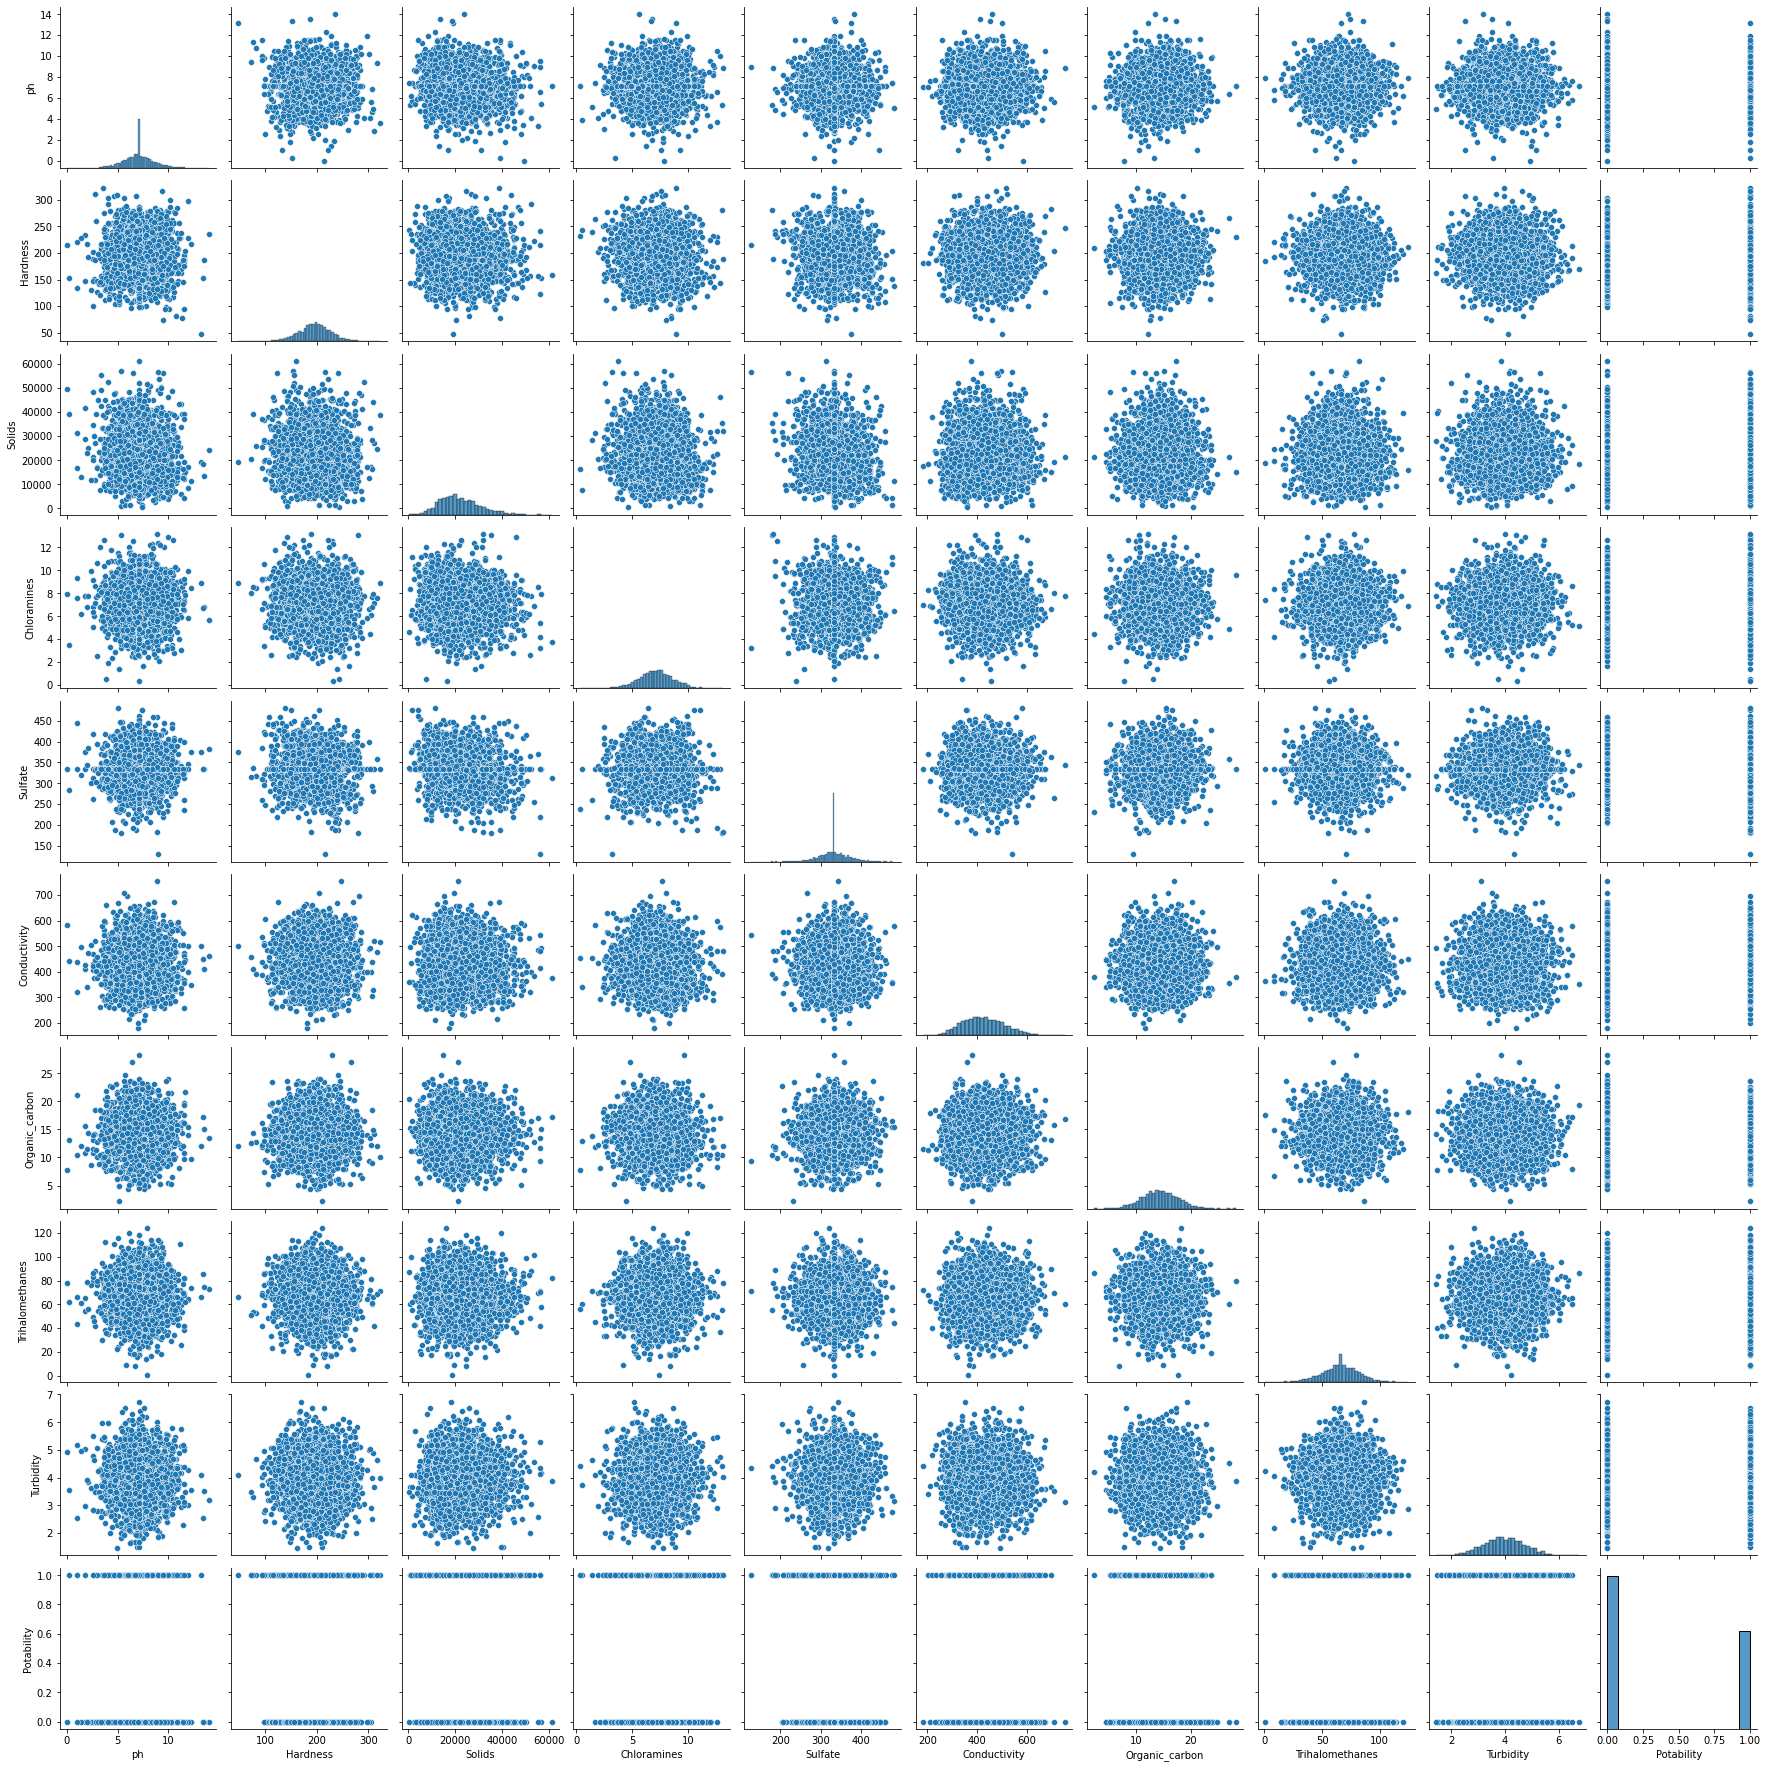

In [5]:
#Смотрим с чем рабоатем
#sns.set_theme(style="ticks")
sns.pairplot(df.dropna())

In [6]:
#Приводим все значения датасета к значению от 0 до 1, чтобы уравнять влияние стобцов на нашу модель
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']] = scaler.fit_transform(df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']])

In [7]:
#Разбиваем данные на тестовые и обучающие
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Potability'), 
                                                    df['Potability'], 
                                                    stratify=df['Potability'], 
                                                    random_state=1)

In [8]:
#Импортируем модель и обучаем ее
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)

In [9]:
#Сравниваем предсказаныне значения, с реальными
clf.score(X_test, y_test)

0.6996336996336996

In [10]:
#Используем метод опорных векторов
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6813186813186813

Ниже мы изменяем различные параметры модели, чтобы проследить, как изменится результат ее работы

In [18]:
clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(45,50)).fit(X_train, y_train)
clf.score(X_test, y_test)

0.6825396825396826

In [19]:
clf = MLPClassifier(random_state=1, max_iter=1000, activation='identity').fit(X_train, y_train)
clf.score(X_test, y_test)

0.6092796092796092

In [20]:
clf = MLPClassifier(random_state=1, max_iter=1000, activation='tanh').fit(X_train, y_train)
clf.score(X_test, y_test)

0.6092796092796092